In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = ['Andrey', 'Petya', 'Vasya', 'Bob', 'Mary']
counts = [968, 155, 77, 578, 973]

people_dataset = list(zip(names, counts))
people_dataset

[('Andrey', 968), ('Petya', 155), ('Vasya', 77), ('Bob', 578), ('Mary', 973)]

In [3]:
df = pd.DataFrame(data=people_dataset, columns=['Names', 'Counts'])
df

,Names,Counts
0,Andrey,968
1,Petya,155
2,Vasya,77
3,Bob,578
4,Mary,973


In [4]:
df.to_csv?

In [5]:
df.to_csv('people1.csv', index=False, header=False)

In [6]:
pd.read_csv?

In [7]:
df = pd.read_csv('people1.csv', names=['Names', 'Counts'])
df

,Names,Counts
0,Andrey,968
1,Petya,155
2,Vasya,77
3,Bob,578
4,Mary,973


In [8]:
df.shape

(5, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   5 non-null      object
 1   Counts  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [11]:
df.describe()

,Counts
count,5.000000
mean,550.200000
std,428.424672
min,77.000000
25%,155.000000
50%,578.000000
75%,968.000000
max,973.000000


In [13]:
max_value = df['Counts'].max()
max_value

973

In [16]:
sorted = df.sort_values(['Counts'], ascending=False)
sorted.head(1)


,Names,Counts
4,Mary,973


In [18]:
filter = df['Counts'] == df['Counts'].max()
max_name = df['Names'][filter].values

print(f"{max_name}-{max_value}")


['Mary']-973


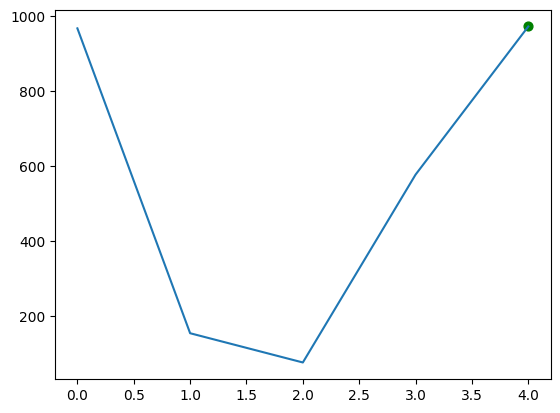

In [24]:
df['Counts'].plot()
plt.scatter(df.sort_values(['Counts'], ascending=False).head(1).index[0], max_value, color='green', s=40, marker='o')
# add point for max value

In [25]:
from numpy import random

In [27]:
random.randint?

In [30]:
random.randint(2, size=10)

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [32]:
# [0, 1000] - 1000 elements
random.seed(341)
random_counts = [random.randint(low=0, high=1001) for i in range(1000)]
random_counts[:10]

[627, 869, 803, 279, 2, 538, 388, 324, 437, 704]

In [33]:
random_names = [names[random.randint(low=0, high=len(names))] for i in range(1000)]
random_names[:10]

['Mary',
 'Bob',
 'Vasya',
 'Mary',
 'Andrey',
 'Petya',
 'Bob',
 'Vasya',
 'Mary',
 'Mary']

In [34]:
people_dataset = list(zip(random_names, random_counts))

df = pd.DataFrame(data=people_dataset, columns=['Names', 'Counts'])
df.head(10)

,Names,Counts
0,Mary,627
1,Bob,869
2,Vasya,803
3,Mary,279
4,Andrey,2
5,Petya,538
6,Bob,388
7,Vasya,324
8,Mary,437
9,Mary,704


In [35]:
df.to_csv('people1000.csv', index=False, header=False)

In [36]:
df.shape

(1000, 2)

In [37]:
df.tail(10)

,Names,Counts
990,Petya,500
991,Petya,989
992,Andrey,438
993,Andrey,484
994,Bob,799
995,Vasya,366
996,Petya,959
997,Mary,321
998,Vasya,772
999,Andrey,552


In [38]:
df.Names.describe()

,Names
count,1000
unique,5
top,Andrey
freq,214


In [39]:
df.Names.unique()

array(['Mary', 'Bob', 'Vasya', 'Andrey', 'Petya'], dtype=object)

In [40]:
groupped_df = df.groupby(df['Names']).sum()
groupped_df.head()

,Counts
Names,
Andrey,103857
Bob,87827
Mary,98695
Petya,90876
Vasya,97100


<Axes: xlabel='Names'>

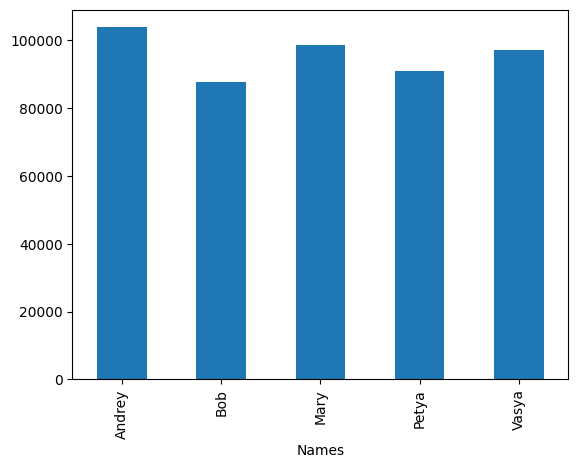

In [41]:
groupped_df['Counts'].plot.bar()

# Series

In [42]:
l = [1,3,5, np.nan, 4, 8]
col1 = pd.Series(l)
col1

,0
0,1.0
1,3.0
2,5.0
3,NaN
4,4.0
5,8.0


In [43]:
col1.isna()

,0
0,False
1,False
2,False
3,True
4,False
5,False


In [44]:
col1 != col1

,0
0,False
1,False
2,False
3,True
4,False
5,False


In [45]:
col1.describe()

,0
count,5.000000
mean,4.200000
std,2.588436
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,8.000000


In [46]:
col1[2]

5.0

In [47]:
col1[2] = 7

In [48]:
col1

,0
0,1.0
1,3.0
2,7.0
3,NaN
4,4.0
5,8.0


In [51]:
col2 = col1[::-1]
col2

,0
5,8.0
4,4.0
3,NaN
2,7.0
1,3.0
0,1.0


In [52]:
col3 = col1 + col2
col3

,0
0,2.0
1,6.0
2,14.0
3,NaN
4,8.0
5,16.0


In [53]:
np.exp(col3)

,0
0,7.389056e+00
1,4.034288e+02
2,1.202604e+06
3,NaN
4,2.980958e+03
5,8.886111e+06


In [54]:
col3.index

RangeIndex(start=0, stop=6, step=1)

In [55]:
index2 = list('abcdef')

col4 = pd.Series(l, index=index2)
col4

,0
a,1.0
b,3.0
c,5.0
d,NaN
e,4.0
f,8.0


In [56]:
col4[2]

<ipython-input-56-d83d15f0a6dc>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  col4[2]


5.0

In [57]:
col4['c']

5.0

In [58]:
col4.sort_values()

,0
a,1.0
b,3.0
e,4.0
c,5.0
f,8.0
d,NaN


In [60]:
dates = pd.date_range('20240826', periods=10)
dates

DatetimeIndex(['2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29',
               '2024-08-30', '2024-08-31', '2024-09-01', '2024-09-02',
               '2024-09-03', '2024-09-04'],
              dtype='datetime64[ns]', freq='D')

In [62]:
# generate numbers list with norm distribution (10 values)
# create column with values and dates index
mu, sigma = 0, 1
random_number = [random.normal(mu, sigma) for i in range(10)]

In [63]:
s = pd.Series(random_number, index=dates)
s

,0
2024-08-26,2.584462
2024-08-27,1.158975
2024-08-28,-1.259959
2024-08-29,1.112992
2024-08-30,-1.228935
2024-08-31,-1.030715
2024-09-01,0.682593
2024-09-02,-1.892020
2024-09-03,0.964190
2024-09-04,1.427216


In [64]:
filter2 = s > 0
filter2

,0
2024-08-26,True
2024-08-27,True
2024-08-28,False
2024-08-29,True
2024-08-30,False
2024-08-31,False
2024-09-01,True
2024-09-02,False
2024-09-03,True
2024-09-04,True


In [65]:
s[filter2]

,0
2024-08-26,2.584462
2024-08-27,1.158975
2024-08-29,1.112992
2024-09-01,0.682593
2024-09-03,0.964190
2024-09-04,1.427216


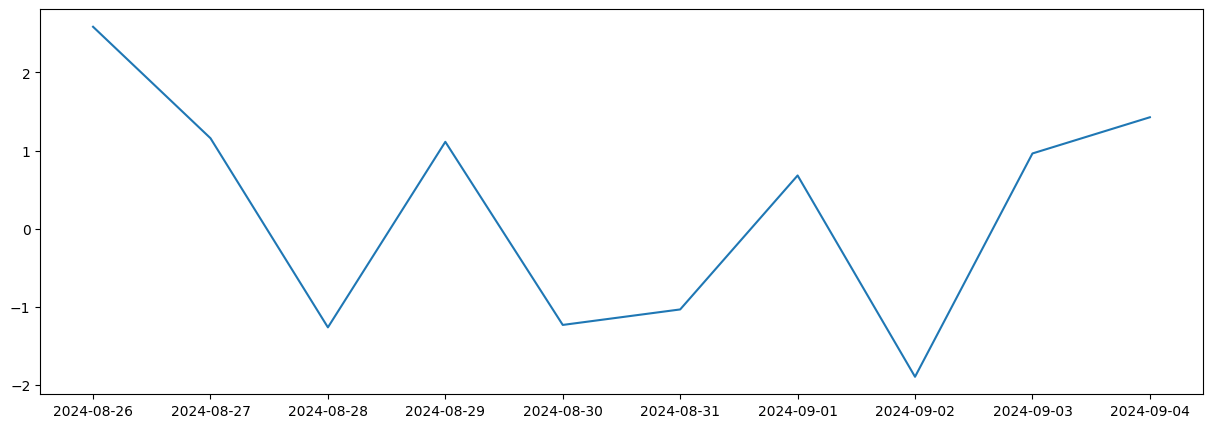

In [67]:
plt.figure(figsize=(15, 5))
plt.plot(s)
plt.show()

In [70]:
d = {
    'one': pd.Series(range(5), index=list('abcdg')),
    'two': pd.Series(range(7), index=list('abcdefg')),
    'three': pd.Series([random.normal(mu, sigma) for i in range(7)], index=list('abcdefg'))
}
d

{'one': a    0
 b    1
 c    2
 d    3
 g    4
 dtype: int64,
 'two': a    0
 b    1
 c    2
 d    3
 e    4
 f    5
 g    6
 dtype: int64,
 'three': a   -1.015924
 b   -0.973249
 c    0.013148
 d    0.167058
 e   -0.088216
 f   -2.388443
 g   -0.023914
 dtype: float64}

In [71]:
df1 = pd.DataFrame(d)
df1

,one,two,three
a,0.0,0,-1.015924
b,1.0,1,-0.973249
c,2.0,2,0.013148
d,3.0,3,0.167058
e,NaN,4,-0.088216
f,NaN,5,-2.388443
g,4.0,6,-0.023914


In [72]:
df1.dtypes

,0
one,float64
two,int64
three,float64


In [73]:
df1.columns

Index(['one', 'two', 'three'], dtype='object')

In [75]:
df1.values

array([[ 0.        ,  0.        , -1.01592358],
       [ 1.        ,  1.        , -0.97324937],
       [ 2.        ,  2.        ,  0.01314798],
       [ 3.        ,  3.        ,  0.16705795],
       [        nan,  4.        , -0.08821627],
       [        nan,  5.        , -2.38844316],
       [ 4.        ,  6.        , -0.02391381]])

In [76]:
df1.T

,a,b,c,d,e,f,g
one,0.000000,1.000000,2.000000,3.000000,NaN,NaN,4.000000
two,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
three,-1.015924,-0.973249,0.013148,0.167058,-0.088216,-2.388443,-0.023914


In [77]:
df1.sort_values(by='one', ascending=False)

,one,two,three
g,4.0,6,-0.023914
d,3.0,3,0.167058
c,2.0,2,0.013148
b,1.0,1,-0.973249
a,0.0,0,-1.015924
e,NaN,4,-0.088216
f,NaN,5,-2.388443


In [79]:
# сгенерировать массив точек 3D
# создать DataFrame (x,y,z)
# отсортировать

x = [random.normal(mu, sigma) for i in range(100)]
y = [random.normal(mu, sigma) for i in range(100)]
z = [random.normal(mu, sigma) for i in range(100)]
points_dataset = list(zip(x, y, z))

pd.DataFrame(points_dataset, columns=['x', 'y', 'z']).sort_values(by=['x', 'y', 'z'])

,x,y,z
89,-2.550891,0.473319,0.289496
77,-1.933149,0.674216,3.083984
31,-1.809121,-0.936283,0.736463
36,-1.648978,-1.275402,-0.108184
22,-1.476153,1.134108,-0.855202
...,...,...,...
85,1.599716,-1.060796,0.451053
90,1.684613,0.315507,-0.211772
97,1.810597,1.580984,0.945927
3,2.327124,2.325277,-0.412125


In [80]:
df1['one']

,one
a,0.0
b,1.0
c,2.0
d,3.0
e,NaN
f,NaN
g,4.0


In [81]:
df1.one

,one
a,0.0
b,1.0
c,2.0
d,3.0
e,NaN
f,NaN
g,4.0


In [83]:
df1['one'].index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

In [84]:
df1['one'].name

'one'

In [85]:
df1['one']['c']

2.0

In [86]:
df1['b':'d']

,one,two,three
b,1.0,1,-0.973249
c,2.0,2,0.013148
d,3.0,3,0.167058


In [88]:
df1.loc['b', 'one']

1.0

In [89]:
df1.iloc[2]

,c
one,2.000000
two,2.000000
three,0.013148


In [90]:
df1.iloc[2,2]

0.013147980541956003

In [92]:
df1.query('one >= two')

,one,two,three
a,0.0,0,-1.015924
b,1.0,1,-0.973249
c,2.0,2,0.013148
d,3.0,3,0.167058


In [95]:
df1[df1.one >= df1.two]

,one,two,three
a,0.0,0,-1.015924
b,1.0,1,-0.973249
c,2.0,2,0.013148
d,3.0,3,0.167058


In [97]:
df1['4th'] = df1['one'] * df1['two']
df1['flag'] = df1['one'] > 1
df1

,one,two,three,4th,flag
a,0.0,0,-1.015924,0.0,False
b,1.0,1,-0.973249,1.0,False
c,2.0,2,0.013148,4.0,True
d,3.0,3,0.167058,9.0,True
e,NaN,4,-0.088216,NaN,False
f,NaN,5,-2.388443,NaN,False
g,4.0,6,-0.023914,24.0,True


In [98]:
del df1['two']
df1['foo'] = 0
df1

,one,three,4th,flag,foo
a,0.0,-1.015924,0.0,False,0
b,1.0,-0.973249,1.0,False,0
c,2.0,0.013148,4.0,True,0
d,3.0,0.167058,9.0,True,0
e,NaN,-0.088216,NaN,False,0
f,NaN,-2.388443,NaN,False,0
g,4.0,-0.023914,24.0,True,0


In [99]:
df1.iat[1,0] = 2
df1

,one,three,4th,flag,foo
a,0.0,-1.015924,0.0,False,0
b,2.0,-0.973249,1.0,False,0
c,2.0,0.013148,4.0,True,0
d,3.0,0.167058,9.0,True,0
e,NaN,-0.088216,NaN,False,0
f,NaN,-2.388443,NaN,False,0
g,4.0,-0.023914,24.0,True,0


In [101]:
df1['one']['b'] = 3
df1

<ipython-input-101-aecd82caa541>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['one']['b'] = 3


,one,three,4th,flag,foo
a,0.0,-1.015924,0.0,False,0
b,3.0,-0.973249,1.0,False,0
c,2.0,0.013148,4.0,True,0
d,3.0,0.167058,9.0,True,0
e,NaN,-0.088216,NaN,False,0
f,NaN,-2.388443,NaN,False,0
g,4.0,-0.023914,24.0,True,0


In [102]:
df1.dropna(how='any')

,one,three,4th,flag,foo
a,0.0,-1.015924,0.0,False,0
b,3.0,-0.973249,1.0,False,0
c,2.0,0.013148,4.0,True,0
d,3.0,0.167058,9.0,True,0
g,4.0,-0.023914,24.0,True,0


In [103]:
df1.fillna(value=0)

,one,three,4th,flag,foo
a,0.0,-1.015924,0.0,False,0
b,3.0,-0.973249,1.0,False,0
c,2.0,0.013148,4.0,True,0
d,3.0,0.167058,9.0,True,0
e,0.0,-0.088216,0.0,False,0
f,0.0,-2.388443,0.0,False,0
g,4.0,-0.023914,24.0,True,0


In [104]:
df1.isnull()

,one,three,4th,flag,foo
a,False,False,False,False,False
b,False,False,False,False,False
c,False,False,False,False,False
d,False,False,False,False,False
e,True,False,True,False,False
f,True,False,True,False,False
g,False,False,False,False,False


# DataReader

In [105]:
from pandas_datareader import data

In [106]:
data?

In [107]:
df = data.MoexReader('SBER', '2020-07-02', '2020-07-03').read_all_boards()

<ipython-input-107-57897b1c0ac1>:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = data.MoexReader('SBER', '2020-07-02', '2020-07-03').read_all_boards()
<ipython-input-107-57897b1c0ac1>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = data.MoexReader('SBER', '2020-07-02', '2020-07-03').read_all_boards()


In [108]:
df

,ACCINT,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,...,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDATWAP,YIELDCLOSE,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2020-07-02,NaN,NaN,NaN,NaN,NaN,RPMO,NaN,NaN,NaN,209.50,...,NaN,NaN,1.790613e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-03,NaN,NaN,NaN,NaN,NaN,RPMO,NaN,NaN,NaN,210.59,...,NaN,NaN,1.836143e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,EQRP,NaN,NaN,NaN,4.25,...,NaN,NaN,8.000984e+09,NaN,3.93000,NaN,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,PSRD,NaN,NaN,NaN,0.65,...,NaN,NaN,1.125761e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,PSRP,NaN,NaN,NaN,4.50,...,NaN,NaN,1.448042e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-03,NaN,NaN,NaN,NaN,NaN,EQRP,NaN,NaN,NaN,2.90,...,NaN,NaN,1.247663e+10,NaN,3.34000,NaN,NaN,NaN,NaN,NaN
2020-07-03,NaN,NaN,NaN,NaN,NaN,PSRD,NaN,NaN,NaN,1.90,...,NaN,NaN,8.600262e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-03,NaN,NaN,NaN,NaN,NaN,PSRP,NaN,NaN,NaN,4.49,...,NaN,NaN,5.984653e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,0.000000e+00,NaN,NaN,SMAL,NaN,NaN,NaN,209.90,...,NaN,NaN,1.014523e+04,49.0,208.11000,0.0,NaN,NaN,NaN,NaN


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2020-07-02 to 2020-07-03
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ACCINT                      0 non-null      object 
 1   ADMITTEDQUOTE               2 non-null      float64
 2   ADMITTEDVALUE               4 non-null      float64
 3   BEICLOSE                    0 non-null      object 
 4   BID                         2 non-null      float64
 5   BOARDID                     18 non-null     object 
 6   BOARDNAME                   0 non-null      object 
 7   BUYBACKDATE                 0 non-null      object 
 8   CBRCLOSE                    0 non-null      object 
 9   CLOSE                       14 non-null     float64
 10  CLOSEAUCTIONPRICE           0 non-null      object 
 11  CLOSEPERIOD                 0 non-null      object 
 12  CLOSEVAL                    0 non-null      object 
 13  COUPONPERCENT    

<Axes: xlabel='TRADEDATE'>

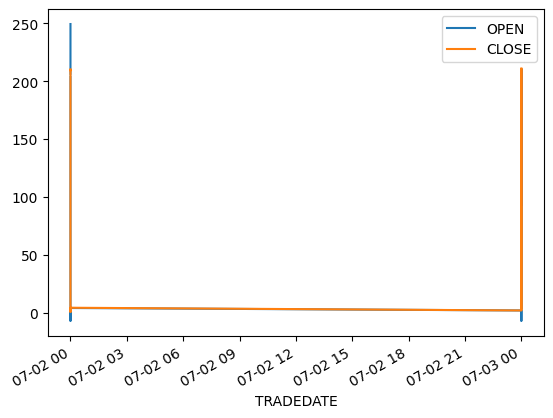

In [110]:
df[['OPEN', 'CLOSE']].plot()

<Axes: xlabel='TRADEDATE'>

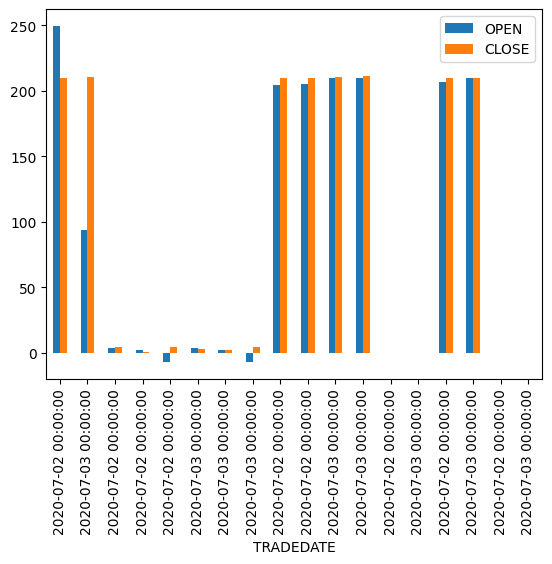

In [111]:
df.loc[:, ['OPEN', 'CLOSE']].plot.bar()